In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
keys_ordered = ["ATSP/br17.atsp", "ATSP/ftv33.atsp", "ATSP/ftv38.atsp", "ATSP/ry48p.atsp", "ATSP/ft53.atsp", "ATSP/ftv55.atsp", "ATSP/ft70.atsp", "ATSP/kro124p.atsp"]

f = open("../in_depth_results.txt", "r")
text = f.read()

optimas = {}
optimas[keys_ordered[0]] = 39
optimas[keys_ordered[1]] = 1286
optimas[keys_ordered[2]] = 1530
optimas[keys_ordered[3]] = 14422
optimas[keys_ordered[4]] = 6905
optimas[keys_ordered[5]] = 1608
optimas[keys_ordered[6]] = 38673
optimas[keys_ordered[7]] = 36230

In [2]:
cases = {}
casename = ""
algorithm = ""
for line in text.split("\n"):
    if line[:7] == "Problem":
        casename = line[8:-1]
        cases[casename] = {}
    if len(line.split()) > 1 and line.split()[1] == "runs":
        algorithm = line.split()[0]
        cases[casename][algorithm] = {}
    
    elements = line.split()

    if len(elements) == 4 and elements[0] == "avg_evals:":
        cases[casename][algorithm]["avg_evals"] = int(elements[1]) / 1000
        cases[casename][algorithm]["sd_evals"] = int(elements[3]) / 1000
    if len(elements) == 4 and elements[0] == "avg_steps:":
        cases[casename][algorithm]["avg_steps"] = int(elements[1])
        cases[casename][algorithm]["sd_steps"] = int(elements[3])
        
    if len(elements) > 6:
        cases[casename][algorithm]["min"] = int(elements[0])
        cases[casename][algorithm]["avg"] = int(elements[1])
        cases[casename][algorithm]["sd"]  = int(elements[2])
        cases[casename][algorithm]["max"] = int(elements[3])
        cases[casename][algorithm]["avg_time"] = int(elements[4][:-4])
        cases[casename][algorithm]["sd_time"] = int(elements[5][:-4])
        
        cases[casename][algorithm]["Qmin"] = (cases[casename][algorithm]["min"] - optimas[casename]) / optimas[casename]
        cases[casename][algorithm]["Qavg"] = (cases[casename][algorithm]["avg"] - optimas[casename]) / optimas[casename]
        cases[casename][algorithm]["Qavg_sd"] = cases[casename][algorithm]["sd"] / optimas[casename]

        #cases[casename][algorithm]["efficiency"] = 1 / (cases[casename][algorithm]["Qavg"] * (1/3)) / cases[casename][algorithm]["avg_time"]


        cases[casename][algorithm]["efficiency"] = cases[casename][algorithm]["Qavg"] / cases[casename][algorithm]["avg_time"]
        ### Check the efficiency
        cases[casename][algorithm]["cycle"] = [i for i in elements[6:]]

        next_dict = {}
        for index, item in enumerate(cases[casename][algorithm]["cycle"]):
            next_dict[item] = cases[casename][algorithm]["cycle"][(index + 1)% len(cases[casename][algorithm]["cycle"])]

        cases[casename][algorithm]["next_dict"] = next_dict

cases = {i: cases[i] for i in keys_ordered if i in cases.keys()}

In [3]:
def cycle_similarity(c1, c2_dict):
    same_edge_count = 0
    for index, node in enumerate(c1):
        if c2_dict[node] == c1[(index+1) % len(c1)]: 
            same_edge_count += 1

    return same_edge_count / len(c1)

In [4]:
print(cycle_similarity(cases["ATSP/br17.atsp"]["R"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["G"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))
print(cycle_similarity(cases["ATSP/br17.atsp"]["S"]["cycle"], cases["ATSP/br17.atsp"]["G"]["next_dict"]))

0.058823529411764705
1.0
0.23529411764705882


In [5]:
print(cases)

{'ATSP/br17.atsp': {'R': {'avg_evals': 127.252, 'sd_evals': 3.551, 'min': 47, 'avg': 247, 'sd': 58, 'max': 445, 'avg_time': 7, 'sd_time': 10, 'Qmin': 0.20512820512820512, 'Qavg': 5.333333333333333, 'Qavg_sd': 1.4871794871794872, 'efficiency': 0.7619047619047619, 'cycle': ['15', '7', '16', '8', '9', '10', '12', '11', '1', '2', '13', '0', '6', '5', '3', '4', '14'], 'next_dict': {'15': '7', '7': '16', '16': '8', '8': '9', '9': '10', '10': '12', '12': '11', '11': '1', '1': '2', '2': '13', '13': '0', '0': '6', '6': '5', '5': '3', '3': '4', '4': '14', '14': '15'}}, 'RW': {'avg_evals': 358.899, 'sd_evals': 3.947, 'min': 43, 'avg': 247, 'sd': 58, 'max': 445, 'avg_time': 2, 'sd_time': 7, 'Qmin': 0.10256410256410256, 'Qavg': 5.333333333333333, 'Qavg_sd': 1.4871794871794872, 'efficiency': 2.6666666666666665, 'cycle': ['4', '6', '5', '15', '14', '1', '12', '11', '0', '9', '13', '2', '10', '8', '7', '16', '3'], 'next_dict': {'4': '6', '6': '5', '5': '15', '15': '14', '14': '1', '1': '12', '12': '11

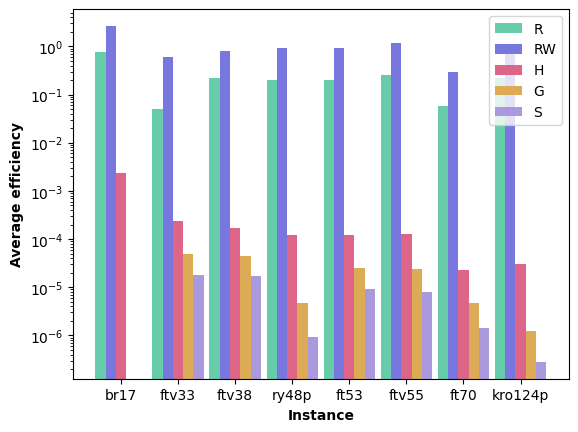

In [6]:
dataset = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["efficiency"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["R"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa99dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], log = True, color = colors[index], width=barWidth, label=key)
 
#plt.title("Average efficiency of each algorithm per instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average efficiency', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(dataset["R"]))], ticks)
 
plt.legend()
plt.savefig('effic.pdf')
plt.show()

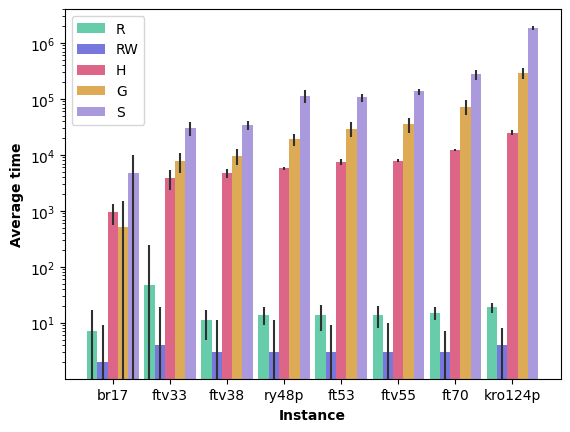

In [7]:
dataset = {}
error = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["avg_time"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["sd_time"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["R"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa99dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], log = True, color = colors[index], width=barWidth, label=key)
    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')
 
#plt.title("Average time of each algorithm per instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average time', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(dataset["R"]))], ticks)
 
plt.legend()
plt.savefig('times.pdf')
plt.show()


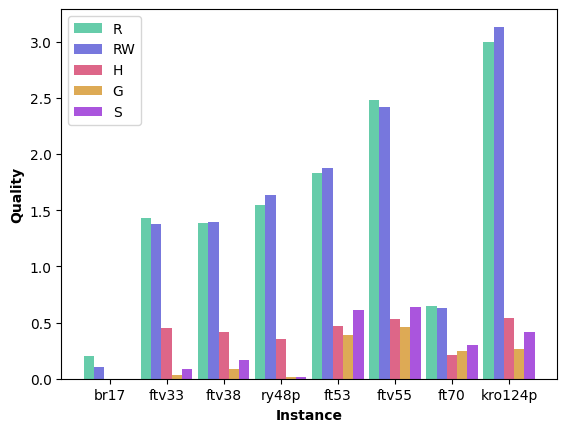

In [8]:
dataset = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["Qmin"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["R"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)

#plt.title("Quality measure of best solution for each algorithm and instance,\n with respect to the best known solution", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Quality', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(dataset["R"]))], ticks)
 
plt.legend()
plt.savefig('quality_best.pdf')
plt.show()

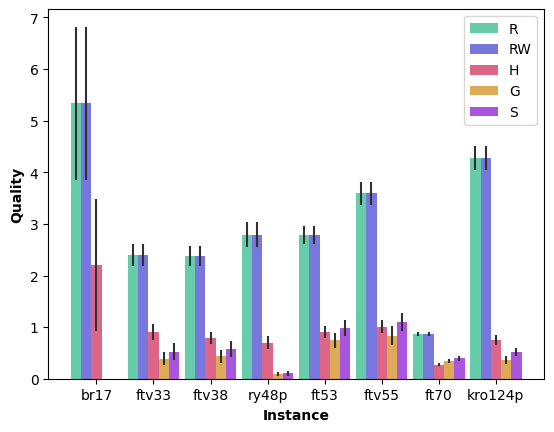

In [9]:
dataset = {}
error = {}
for algorithm in list(cases[list(cases.keys())[0]].keys()):
    dataset[algorithm] = [cases[case][algorithm]["Qavg"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["Qavg_sd"] for case in cases.keys()]
    

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.18
 
r_list = []
r_list.append(np.arange(len(dataset["R"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#dd6688", "#ddaa55", "#aa55dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)

    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')

#plt.title("Quality measure of average solution for each algorithm and instance,\n with respect to the best known solution", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Quality', fontweight='bold')
plt.xticks([r + 2*barWidth for r in range(len(dataset["R"]))], ticks)
 
plt.legend()
plt.savefig('quality_avg.pdf')
plt.show()

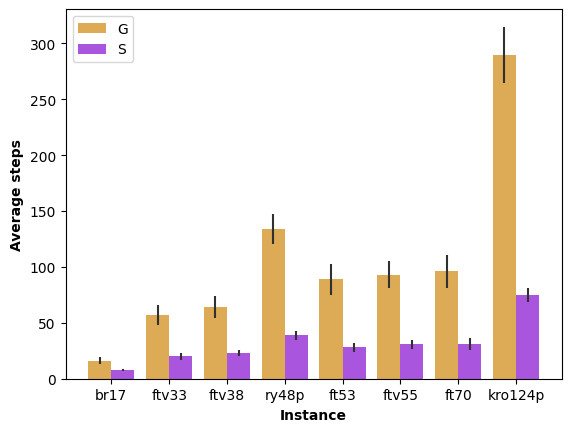

In [10]:
dataset = {}
error = {}
for algorithm in ["G", "S"]:
    dataset[algorithm] = [cases[case][algorithm]["avg_steps"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["sd_steps"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.4
 
r_list = []
r_list.append(np.arange(len(dataset["S"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#ddaa55", "#aa55dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)

    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')
 
#plt.title("Number of algorithm steps per algorithm for each instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average steps', fontweight='bold')
plt.xticks([r + 0.5*barWidth for r in range(len(dataset["S"]))], ticks)
 
plt.legend()
plt.savefig('steps.pdf')
plt.show()

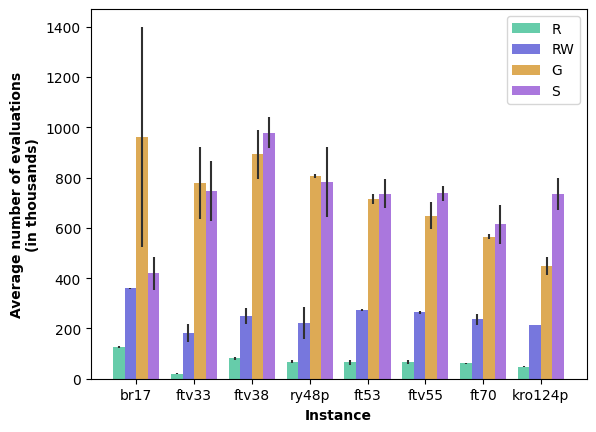

In [11]:
dataset = {}
error = {}
for algorithm in ["R", "RW", "G", "S"]:
    dataset[algorithm] = [cases[case][algorithm]["avg_evals"] for case in cases.keys()]
    error[algorithm] = [cases[case][algorithm]["sd_evals"] for case in cases.keys()]

ticks = [i[5:-5] for i in list(cases.keys())] ### instances
 
barWidth = 0.2
 
r_list = []
r_list.append(np.arange(len(dataset["S"])))
for i in range(len(dataset.keys()) - 1):
    r_list.append([x + barWidth for x in r_list[-1]])

colors = ["#66ccaa", "#7777dd", "#ddaa55", "#aa77dd"]
 
for index, key in enumerate(list(dataset.keys())):
    plt.bar(r_list[index], dataset[key], color = colors[index], width=barWidth, label=key)
    #plt.barh(r_list[index], width=dataset[key], color = colors[index], label=key)
    plt.errorbar(r_list[index], dataset[key], error[key], linestyle='None', color='#303030')
 
#plt.title("Number of evaluated solutions per algorithm for each instance", fontweight='bold')
plt.xlabel('Instance', fontweight='bold')
plt.ylabel('Average number of evaluations\n(in thousands)', fontweight='bold')
plt.xticks([r + 1.5*barWidth for r in range(len(dataset["S"]))], ticks)
 
plt.legend()
plt.savefig('evals.pdf')
plt.show()